In [2]:
import sympy as sp
import numpy as np
from IPython.display import display
import functools as ft
import operator as op
import matplotlib.pyplot as plt

In [3]:
def og_r_t(T):
    return np.sqrt(1-T), np.sqrt(T)

def r_t(n):
    return "r%d t%d"%(n,n)

def mirror(sym): #Input: One string with the names of the r and t variables. Ex: 'r1 t1'
    r, t=sp.symbols(sym)    
    return sp.Matrix([[-1,r],[-r,r**2+t**2]])*(sp.I/t)

def space(sym): #Input: String with names of variables k and L. Ex: 'k L1'
    k, L=sp.symbols(sym)
    return sp.Matrix([[sp.exp(sp.I*k*L),0],[0,sp.exp(-sp.I*k*L)]])

def cav_matrix(cav_num):
    cavity=ft.reduce(op.mul,[mirror(r_t(i//2)) if i%2==0 else space('k L%d'%(i//2)) for i in range(2,2*cav_num+3)])
    return sp.simplify(cavity)

# TM cavity

In [4]:
#Three mirror cavity matrix
tm=cav_matrix(2)
display(tm)

Matrix([
[                                 I*(r3*(r1*(r2**2 + t2**2) - r2*exp(2*I*L1*k))*exp(I*L1*k) - (r1*r2 - exp(2*I*L1*k))*exp(I*k*(L1 + 2*L2)))*exp(-I*k*(2*L1 + L2))/(t1*t2*t3),                                  I*(r3*(r1*r2 - exp(2*I*L1*k))*exp(I*k*(L1 + 2*L2)) - (r3**2 + t3**2)*(r1*(r2**2 + t2**2) - r2*exp(2*I*L1*k))*exp(I*L1*k))*exp(-I*k*(2*L1 + L2))/(t1*t2*t3)],
[I*(-r3*(r1*r2*exp(2*I*L1*k) - (r1**2 + t1**2)*(r2**2 + t2**2))*exp(I*L1*k) + (r1*exp(2*I*L1*k) - r2*(r1**2 + t1**2))*exp(I*k*(L1 + 2*L2)))*exp(-I*k*(2*L1 + L2))/(t1*t2*t3), I*(-r3*(r1*exp(2*I*L1*k) - r2*(r1**2 + t1**2))*exp(I*k*(L1 + 2*L2)) + (r3**2 + t3**2)*(r1*r2*exp(2*I*L1*k) - (r1**2 + t1**2)*(r2**2 + t2**2))*exp(I*L1*k))*exp(-I*k*(2*L1 + L2))/(t1*t2*t3)]])

### TM cavity approximation starting from the transmission function directly. 

In [38]:
#Defining the angular frequency as w=\omega + \Omega and doing the first approximation
w, W, c, L1=sp.symbols('\omega \Omega c L1')
TFA=tm[0,0].subs('k',(w+W)/c) #TFA=Transmission Function Aproximation
display(TFA)

I*(r3*(r1*(r2**2 + t2**2) - r2*exp(2*I*L1*(\Omega + \omega)/c))*exp(I*L1*(\Omega + \omega)/c) - (r1*r2 - exp(2*I*L1*(\Omega + \omega)/c))*exp(I*(L1 + 2*L2)*(\Omega + \omega)/c))*exp(-I*(2*L1 + L2)*(\Omega + \omega)/c)/(t1*t2*t3)

In [39]:
TFA=sp.simplify(sp.expand(TFA).subs(L1*W,0)) #from this recognize the FP transmission function
display(TFA) 

I*(r1*r2**2*r3 - r1*r2*exp(2*I*L2*(\Omega + \omega)/c) + r1*r3*t2**2 - r2*r3*exp(2*I*L1*\omega/c) + exp(2*I*(L1*\omega + L2*\Omega + L2*\omega)/c))*exp(-I*(L1*\omega + L2*\Omega + L2*\omega)/c)/(t1*t2*t3)

### TM cavity approximation with the effective mirror

In [48]:
fp=cav_matrix(1)
fp_eff=fp.subs('k',w/c) #fp cavity as an effective mirror with the approximation. 
space2=space('k L2').subs('k', (w+W)/c) #space matrix between mirror 2 and 3 with the w=\omega + \Omega
mirror3=mirror('r3 t3') #mirror 3 matrix
#display(fp_eff), 
#display(space2) 
#display(mirror3)
tm_eff=fp_eff*space2*mirror3 #the tm cavity with the effective mirror approximation
TFA_eff=sp.simplify(tm_eff[0,0])
diff=sp.simplify(TFA-TFA_eff) #difference between the previous approximation and this one. 
display(diff) 
display(TFA_eff)

0

I*(r3*(r1*(r2**2 + t2**2) - r2*exp(2*I*L1*\omega/c))*exp(I*L1*\omega/c) - (r1*r2 - exp(2*I*L1*\omega/c))*exp(I*(L1*\omega + 2*L2*(\Omega + \omega))/c))*exp(-I*(2*L1*\omega + L2*(\Omega + \omega))/c)/(t1*t2*t3)

# TM transmission and refelctivity functions plots

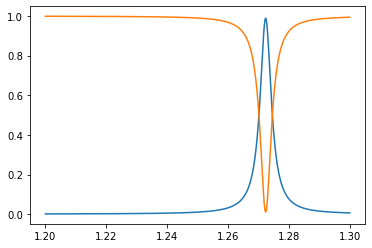

In [50]:
T_func=sp.lambdify(['k','L1, L2', 'r1', 'r2', 'r3', 't1', 't2', 't3'], abs(1/tm[0,0])**2, modules=['numpy'])
R_func=sp.lambdify(['k','L1, L2', 'r1', 'r2', 'r3', 't1', 't2', 't3'], abs(tm[1,0]/tm[0,0])**2, modules=['numpy'])
T_eff=sp.lambdify([w, W,'L1, L2', 'r1', 'r2', 'r3', 't1', 't2', 't3'], abs(TFA_eff)**2, modules=['numpy'])
freq=np.arange(1.2,1.3,0.0001)
r, t=lambda x: np.sqrt(1-x**2), lambda x: np.sqrt(x)
ts=[t(0.02), t(0.02), t(0.02)]
rs=[r(ts[0]), r(ts[1]), r(ts[2])]  
plt.plot(freq,T_func(freq, 0.05, 5, *rs, *ts))
plt.plot(freq,R_func(freq, 0.05, 5, *rs, *ts))
#plt.plot(freq, T_eff(freq, W))